# Timeseries Temperature analysis for GLobal temperature dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
globaltemp=pd.read_csv("/Users/GGS/Desktop/25Nov18/ML/timeseries/GlobalLandTemperaturesByCountry.csv/GlobalLandTemperaturesByCountry.csv")

In [5]:
globaltemp.shape

(577462, 4)

In [6]:
globaltemp.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


In [7]:
fintemp=globaltemp[globaltemp.Country=='Finland']
fintemp=fintemp[['dt','AverageTemperature']]

In [8]:
from datetime import datetime
fintemp.dt=pd.to_datetime(fintemp.dt)
fintemp.index=fintemp.dt

In [9]:
fintemp1=fintemp.drop('dt',axis=1)

In [10]:
(fintemp1.isnull().sum())

AverageTemperature    73
dtype: int64

In [11]:
fintemp1.fillna(method='bfill',inplace=True)

In [12]:
(fintemp1.isnull().sum())

AverageTemperature    1
dtype: int64

In [13]:
fintemp1.dropna(inplace=True)

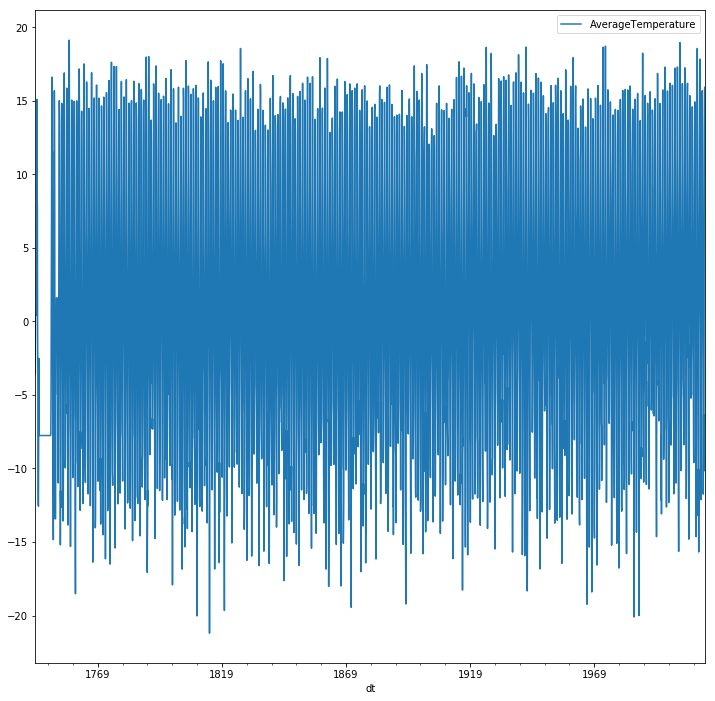

In [14]:
fintemp1.plot(kind='line',figsize=(12,12))

In [15]:
fintemp2=fintemp1['1920':]

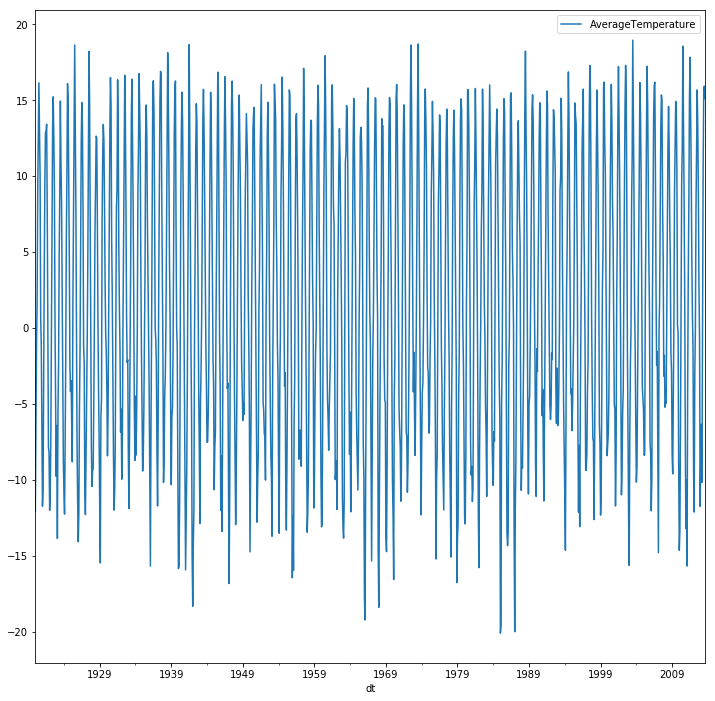

In [16]:
fintemp2.plot(kind='line',figsize=(12,12))

In [17]:
fintemp2_=fintemp2

In [18]:
fintemp2_2=fintemp2_+25

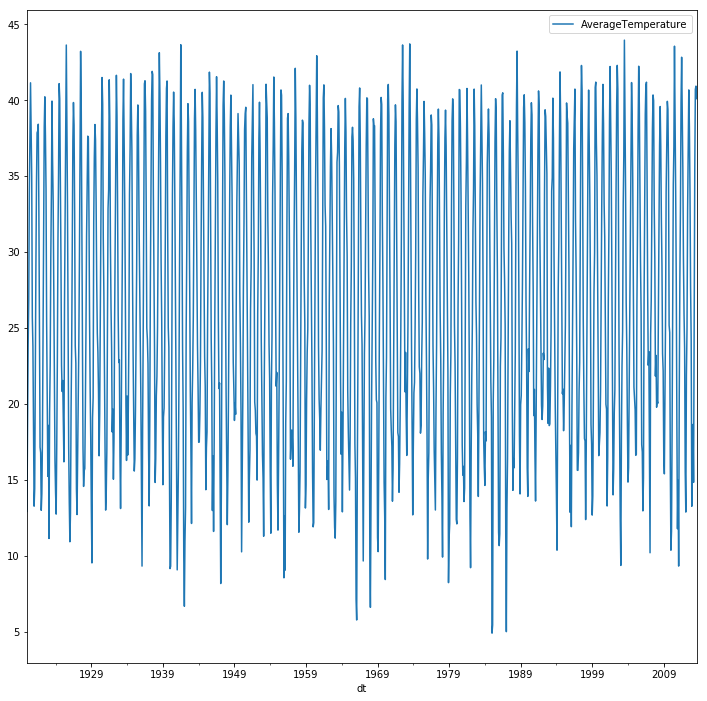

In [19]:
fintemp2_2.plot(kind='line',figsize=(12,12))

In [23]:
from utils import  arima_gridsearch_cv,ad_fuller_test, plot_rolling_stats,plot_acf_pacf, arima_gridsearch_cv

Test Statistic                -5.670744e+00
p-value                        8.934263e-07
#Lags Used                     2.200000e+01
Number of Observations Used    1.101000e+03
Critical Value (5%)           -2.864169e+00
Critical Value (1%)           -3.436303e+00
Critical Value (10%)          -2.568170e+00
dtype: float64


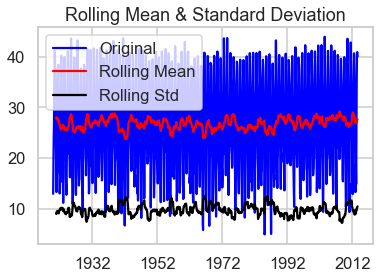

In [24]:
ad_fuller_test(fintemp2_2.AverageTemperature)
plot_rolling_stats(fintemp2_2.AverageTemperature)

In [25]:
log_series = np.log(fintemp2_2.AverageTemperature)

Test Statistic                   -5.511365
p-value                           0.000002
#Lags Used                       22.000000
Number of Observations Used    1101.000000
Critical Value (5%)              -2.864169
Critical Value (1%)              -3.436303
Critical Value (10%)             -2.568170
dtype: float64


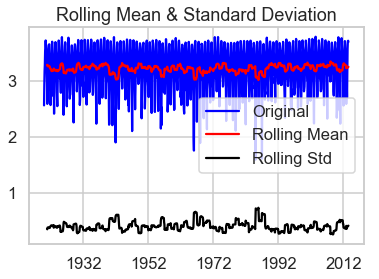

In [26]:
ad_fuller_test(log_series)
plot_rolling_stats(log_series)

In [27]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf

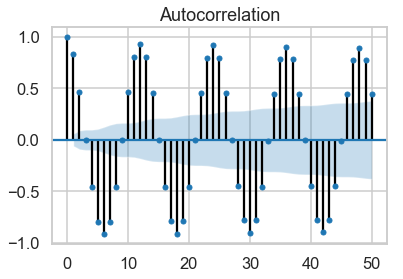

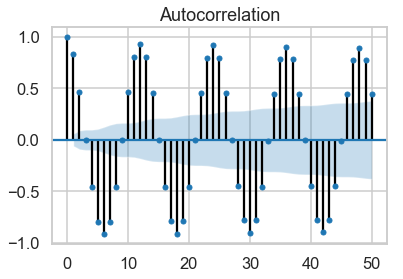

In [28]:
plot_acf(fintemp2_2.AverageTemperature,lags=50)

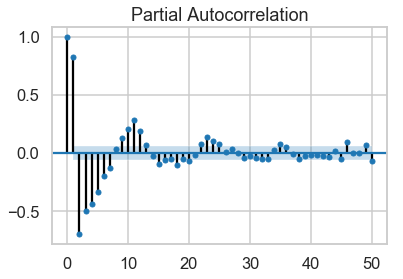

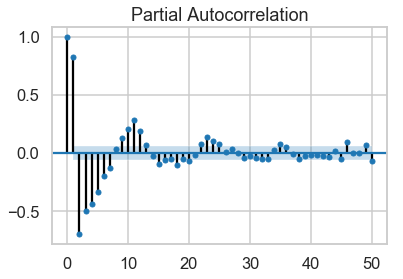

In [29]:
plot_pacf(fintemp2_2.AverageTemperature,lags=50)

In [30]:
import itertools
from statsmodels.tsa.arima_model import ARIMA

In [31]:
p=d=q=range(0,5)
pdq=list(itertools.product(p,d,q))
for param in pdq:
    try:
        mod=ARIMA(fintemp2_2.AverageTemperature,order=param)
        results=mod.fit()
        print('ARIMA{} - AIC:{}'.format(param,results.aic))
    except:
        continue

C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 0) - AIC:8237.19654914514


C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1) - AIC:7235.684299618792


C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 3) - AIC:6493.313755480614
ARIMA(0, 1, 0) - AIC:7016.24419287084


C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency informati

ARIMA(0, 1, 1) - AIC:6720.561524627952
ARIMA(0, 1, 2) - AIC:6612.970145958847


C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 3) - AIC:6540.194594107068


C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 4) - AIC:6494.393175113661
ARIMA(0, 2, 0) - AIC:6869.874489393686


C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 2, 1) - AIC:6820.805816115271


C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 2, 2) - AIC:6803.542448581062


C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 2, 3) - AIC:6791.908151417139


C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 2, 4) - AIC:6542.880245239443


C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0) - AIC:6927.007744692652
ARIMA(1, 0, 1) - AIC:6583.343508311691


C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 2) - AIC:7217.5670752681945


C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 3) - AIC:6694.40652461082


C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 4) - AIC:6435.564720121572
ARIMA(1, 1, 0) - AIC:6598.070091724876


C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency informati

ARIMA(1, 2, 0) - AIC:6813.169299195371


C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency informati

ARIMA(2, 0, 0) - AIC:6163.2334029043395


C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(2, 0, 2) - AIC:5270.095984138799


C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(2, 0, 3) - AIC:5124.425307882555


C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\tsatools.py:606: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/
C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\tsatools.py:607: RuntimeWarning: overflow encountered in exp
  (1+np.exp(-params))).copy()
C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\tsatools.py:607: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()
C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\tsatools.py:608: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/
C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\tsatools.py:609: RuntimeWarning: overflow encountered in exp
  (1+np.exp(-params))).copy()
C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\tsatools.py:609: RuntimeWarning: invalid value encountered in tr

ARIMA(2, 1, 0) - AIC:6600.019232217928


C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency informati

ARIMA(2, 2, 0) - AIC:6812.890740308207


C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency informati

ARIMA(2, 2, 3) - AIC:5539.520498520972


C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(3, 0, 0) - AIC:5846.91770350123


C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(3, 0, 2) - AIC:5159.1871086172705


C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(3, 1, 0) - AIC:6515.57331820921


C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency informati

ARIMA(3, 2, 0) - AIC:6809.243731016062


C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency informati

ARIMA(3, 2, 3) - AIC:5450.415727714722
ARIMA(4, 0, 0) - AIC:5611.510937529385


C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(4, 0, 1) - AIC:5462.828415533744


C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(4, 0, 2) - AIC:5180.16338421589


C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(4, 1, 0) - AIC:6314.501876006272


C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency informati

ARIMA(4, 2, 0) - AIC:6803.330081534381


C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency informati

In [39]:
model_1=ARIMA(fintemp2.AverageTemperature,order=(3,0,2))

C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [40]:
arimaresult=model_1.fit()

C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [41]:
arimaresult.aic

5159.660869533875

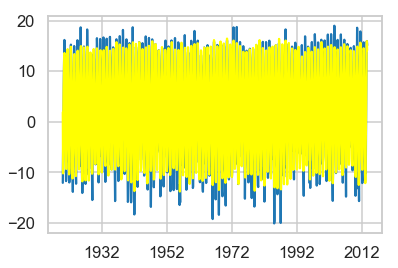

In [42]:
plt.plot(fintemp2.AverageTemperature)
plt.plot(arimaresult.fittedvalues,color='yellow')

In [43]:
temppredict2=arimaresult.forecast(60)

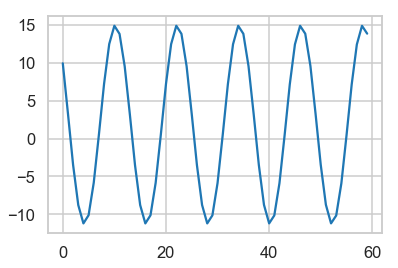

In [44]:
plt.plot(temppredict2[0])